In [1]:
# importing tools 
import s3fs
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.ndimage import gaussian_filter
#for removing warnings
import warnings

In [2]:
# open the data with s3fs from the databucket 
fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
data_path1 = 's3://data/CREG12.L75-REF08_mesh_zgr.zarr'
data_path2 = 's3://velocity-u.zarr'
data_path3 = 's3://velocity-v.zarr'

remote_files1 = fsg.glob(data_path1)
remote_files2 = fsg.glob(data_path2)
remote_files3 = fsg.glob(data_path3)

store1 = s3fs.S3Map(root=data_path1, s3=fsg, check=False)
store2 = s3fs.S3Map(root=data_path2, s3=fsg, check=False)
store3 = s3fs.S3Map(root=data_path3, s3=fsg, check=False)

dzz = xr.open_zarr(store=store1, consolidated=True)
du = xr.open_zarr(store=store2, consolidated=True)
dv = xr.open_zarr(store=store3, consolidated=True)

In [3]:
def open_s3fs(path):
    # open the data with s3fs from the databucket 
    fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
    data_path = f's3://data/{path}'
    remote_files = fsg.glob(data_path)
    fileset = [fsg.open(file) for file in remote_files]
    #open the dataset 
    dset = xr.open_mfdataset(fileset, 
                             #combine='by_coords',
                             compat='override')
    return dset

In [4]:
scalar = open_s3fs('CREG12.L75-REF08_mesh_hgr.nc')
niv = open_s3fs('smooth_grid_karen.nc')

In [5]:
moor_l = [(836, 440),
            (838, 440),
            (836, 439),
            (915, 157),
            (930, 149),
            (932, 147),
            (929, 142),
            (774, 344),
            (766, 358),
            (773, 346),
            (334, 978),
            (334, 978),
            (334, 978),
            (334, 978),
            (409, 992), 
            (399, 987), 
            (395, 985), 
            (434, 997), 
            (440, 993)]
c_list = ['c', 'orangered', 'g',
          'r', 'm', 'y','tab:orange',
          'tab:pink', 'limegreen', 'maroon', 
          'dodgerblue', 'gold', 'peru','deeppink',
          'gold','peru','dodgerblue','c','m']

In [6]:
u = du.vozocrtx.isel(x=slice(200,1400),y=slice(650,1800))
u = u.rename({'depthu' : 'depth'})
v = dv.vomecrty.isel(x=slice(200,1400),y=slice(650,1800))
v = v.rename({'depthv' : 'depth'})

bathym = dzz.mbathy.isel(x=slice(200,1400),y=slice(650,1800)).squeeze(axis=0)

zonal = scalar.glamt.isel(x=slice(200,1399),y=slice(650,1799)).squeeze(axis=0)
merd = scalar.gphit.isel(x=slice(200,1399),y=slice(650,1799)).squeeze(axis=0)

(800.0, 1000.0)

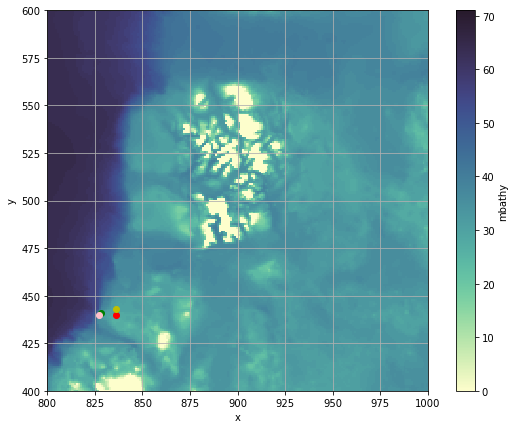

In [41]:
import cmocean
fig, ax = plt.subplots(figsize=(10,7))
bathym.plot(cmap=plt.get_cmap(cmocean.cm.deep))
ax.plot(836, 440, marker='o', color='r')
ax.plot(836, 443, marker='o', color='y')
ax.plot(828, 441, marker='o', color='g')
ax.plot(827, 440, marker='o',color='pink')

ax.grid('on')
ax.set_aspect('equal')
ax.set_ylim(400,600)
ax.set_xlim(800,1000)

In [8]:
nivv = niv.depth.isel(x=slice(200,1400),y=slice(650,1800))

In [9]:
grid_ = niv.isel(x=slice(200,1400),y=slice(650,1800))

In [10]:
#function for making contours for a given fonh value (level)
def make_contours(grid, level):
    cs = plt.contour(grid['x'],grid['y'],grid['depth'], levels = [level])
    dat = cs.allsegs
    #exclude small contours (less than 50 points)
    newdat = []
    for i in range(len(dat[0])):
        if len(dat[0][i]) < 50:
            continue
        newdat.append(dat[0][i]) #put approved arrays into newdat
    return newdat


In [11]:
p=moor_l[0]
print(p)
d = bathym.isel(x=p[0],y=p[1]).values
print(d)
lev = nivv.isel(x=836,y=443)
print(lev.values)

(836, 440)
30
199.78996


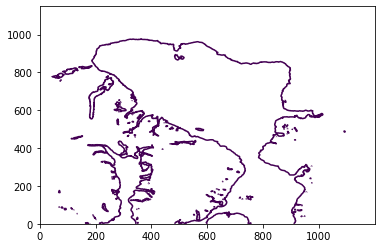

In [14]:
cont = make_contours(grid_,457)


In [19]:
print(p)
for i in range(len(cont)):
    let = np.where(cont[i]==p)
    print (i, let, len(cont[i]))

(836, 440)
0 (array([], dtype=int64), array([], dtype=int64)) 3294
1 (array([], dtype=int64), array([], dtype=int64)) 384
2 (array([ 813, 1058, 1093, 1114, 1157, 1160, 2342, 5619]), array([0, 0, 0, 1, 0, 0, 0, 1])) 6560
3 (array([], dtype=int64), array([], dtype=int64)) 153
4 (array([], dtype=int64), array([], dtype=int64)) 149
5 (array([], dtype=int64), array([], dtype=int64)) 243
6 (array([], dtype=int64), array([], dtype=int64)) 73
7 (array([], dtype=int64), array([], dtype=int64)) 71
8 (array([], dtype=int64), array([], dtype=int64)) 63
9 (array([], dtype=int64), array([], dtype=int64)) 101
10 (array([], dtype=int64), array([], dtype=int64)) 83
11 (array([], dtype=int64), array([], dtype=int64)) 171
12 (array([], dtype=int64), array([], dtype=int64)) 327
13 (array([], dtype=int64), array([], dtype=int64)) 111
14 (array([], dtype=int64), array([], dtype=int64)) 81
15 (array([], dtype=int64), array([], dtype=int64)) 59
16 (array([], dtype=int64), array([], dtype=int64)) 51
17 (array(

In [28]:
print(p)
p1 = cont[2][1114]
p2 = cont[2][1117]
vec = p2-p1
print(vec, p1, p2)



(836, 440)
[1.29147005 2.        ] [827.00399144 440.        ] [828.29546149 442.        ]


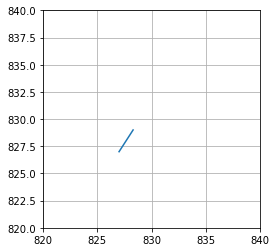

In [44]:
fig,ax = plt.subplots()
ax.plot([827,827+vec[0]],[827,827+vec[1]])
ax.set_aspect('equal')
ax.set_xlim(820,840)
ax.set_ylim(820,840)
ax.grid('on')

In [16]:
vec_l = []
#vec_l.append(vec)

In [17]:
x=moor_l[0][0]
y=moor_l[0][1]

In [18]:
up = u.isel(x=x,y=y,depth=slice(0,d-1))
vp = v.isel(x=x,y=y,depth=slice(0,d-1))
up.shape

(73, 29)

In [36]:
print(x,y)

836 440


In [19]:
vel_par = np.zeros((73,29))
vel_ort = np.zeros((73,29))

In [20]:
for t in range(len(up)):
    print(t)
    vel_par[t] = up[t,:]*vec[0] + vp[t,:]*vec[1]
    vel_ort[t] = up[t,:]*vec[0] - vp[t,:]*vec[1] #rotere vector [x,y] 90 grader m/klokka = [x,-y]
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72


In [26]:
vel_par.shape

(73, 29)

In [37]:
vel_par_ = vel_par/np.sqrt(vec[0]**2 + vec[1]**2)
vel_ort_ = vel_ort/np.sqrt(vec[0]**2 + vec[1]**2)

In [38]:
cov_o = np.cov(vel_ort_.T, bias=True) # uten .T ble den en 73x73 matrise 
cov_p = np.cov(vel_par_.T, bias=True)

values_o, vectors_o = np.linalg.eig(cov_o)
order_o = values_o.argsort()[::-1]
values_o, vectors_o = values_o[order_o], vectors_o[:, order_o]
values_p, vectors_p = np.linalg.eig(cov_p)
order_p = values_p.argsort()[::-1]
values_p, vectors_p = values_p[order_p], vectors_p[:, order_p]

PC1p = (np.sqrt(values_p[0])*vectors_p[:,0])
PC1o = (np.sqrt(values_o[0])*vectors_o[:,0])
PC2p = (np.sqrt(values_p[1])*vectors_p[:,1])
PC2o = (np.sqrt(values_o[1])*vectors_o[:,1])

PVE1p = int(round(values_p[0]/np.sum(values_p)*100,0))
PVE1o = int(round(values_o[0]/np.sum(values_o)*100,0))
PVE2p = int(round(values_p[1]/np.sum(values_p)*100,0))
PVE2o = int(round(values_o[1]/np.sum(values_o)*100,0))


In [29]:
PC1p

array([-0.07874222, -0.07842437, -0.07785232, -0.07726019, -0.07695415,
       -0.0763091 , -0.0745623 , -0.07099034, -0.06475064, -0.0606315 ,
       -0.05023901, -0.04211071, -0.03744985, -0.03004904, -0.01567036,
       -0.00414853, -0.00222227, -0.00161113, -0.00196237, -0.00201208,
       -0.00190338, -0.00172297, -0.00155724, -0.00144487, -0.00137172,
       -0.00137655, -0.00145872, -0.00150083, -0.00337224])

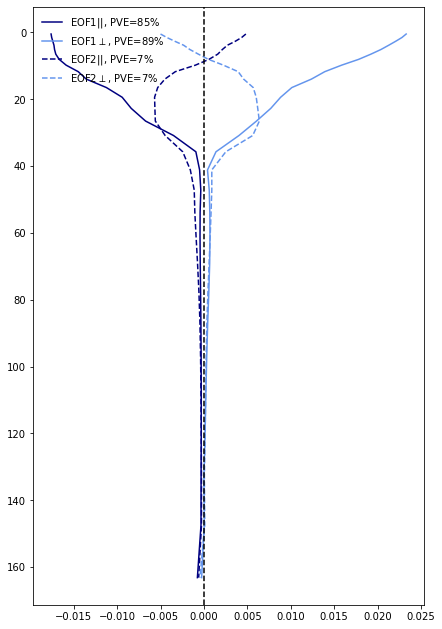

In [39]:
warnings.simplefilter("ignore")
fig, axes = plt.subplots(1,1,figsize = (7,11))

axes.plot(PC1p,up.depth, 'navy', label = f'EOF1$||$, PVE={PVE1p}%')
axes.plot(PC1o,vp.depth, 'cornflowerblue', label = f'EOF1$\perp$, PVE={PVE1o}%')
axes.plot(PC2p,up.depth, 'navy', linestyle = '--', label = f'EOF2$||$, PVE={PVE2p}%')
axes.plot(PC2o,vp.depth, 'cornflowerblue', linestyle = '--', label = f'EOF2$\perp$, PVE={PVE2p}%')
axes.axvline(0, color='k', linestyle = '--')
axes.legend(frameon=False, fontsize=10, loc="upper left") 
axes.invert_yaxis()
#axs.set_xlabel('Current speed [cm/s]', fontsize=14)

#fig.tight_layout()   

#plt.savefig('EOF_Barents_mod_topo.pdf', dpi = 300)

(915, 157),
            (935, 143), --> (930,149)
            (938, 144), --> (932,147)
            (934, 141), --> (929,142)

In [89]:
d = bathym.isel(x=929,y=142).values
print(d-1)
#u.isel(x=931,y=149, depth=d-1).values

39


(850.0, 1000.0)

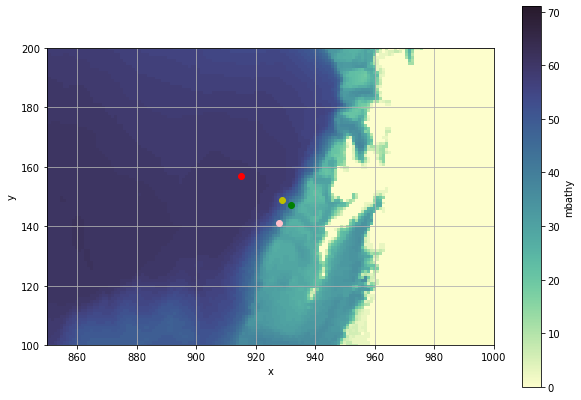

In [86]:
import cmocean
fig, ax = plt.subplots(figsize=(10,7))
bathym.plot(cmap=plt.get_cmap(cmocean.cm.deep))
ax.plot(moor_l[3][0], moor_l[3][1], marker='o', color='r')
ax.plot(moor_l[4][0]-6, moor_l[4][1]+6, marker='o', color='y')
ax.plot(moor_l[5][0]-6, moor_l[5][1]+3, marker='o', color='g')
ax.plot(moor_l[6][0]-6, moor_l[6][1], marker='o', color='pink')
ax.grid('on')
ax.set_aspect('equal')

ax.set_ylim(100,200)
ax.set_xlim(850,1000)

In [ ]:
p=moor_l[4]
print(p)
d = bathym.isel(x=p[0],y=p[1]).values
print(d)
lev = nivv.isel(x=p[0],y=p[1])
print(lev.values)

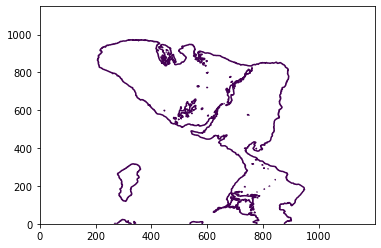

In [103]:
cont = make_contours(grid_,lev)

In [93]:
print(p)
for i in range(len(cont)):
    let = np.where(cont[i]==p)
    print (i, let)

(930, 149)
0 (array([], dtype=int64), array([], dtype=int64))
1 (array([], dtype=int64), array([], dtype=int64))
2 (array([ 252,  252,  321, 4312, 4468, 4512, 4542]), array([0, 1, 0, 1, 1, 1, 1]))
3 (array([ 33, 416]), array([1, 1]))
4 (array([], dtype=int64), array([], dtype=int64))
5 (array([ 9, 51, 61, 63, 66]), array([1, 1, 1, 1, 1]))
6 (array([], dtype=int64), array([], dtype=int64))
7 (array([], dtype=int64), array([], dtype=int64))
8 (array([], dtype=int64), array([], dtype=int64))
9 (array([], dtype=int64), array([], dtype=int64))
10 (array([], dtype=int64), array([], dtype=int64))
11 (array([], dtype=int64), array([], dtype=int64))
12 (array([], dtype=int64), array([], dtype=int64))


In [104]:
p1 = cont[2][252]
p2 = cont[2][253]
vec = p2-p1
print(vec, p1, p2)

[0.5136093 1.       ] [930. 149.] [930.5136093 150.       ]


In [119]:
x=moor_l[4][0]
y=moor_l[4][1]
print(x,y)
up = u.isel(x=x,y=y,depth=slice(0,d-1))
vp = v.isel(x=x,y=y,depth=slice(0,d-1))
up.shape

930 149


(73, 49)

In [120]:
vel_par_lof = np.zeros((73,d-1))
vel_ort_lof = np.zeros((73,d-1))

In [ ]:
print(vec[0],vec[1])

In [121]:
for t in range(len(up)):
    print(t)
    vel_par_lof[t] = up[t,:]*vec[0] + vp[t,:]*vec[1]
    vel_ort_lof[t] = - up[t,:]*vec[1] + vp[t,:]*vec[0] #rotere vector [x,y] 90 grader m/klokka = [x,-y]
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72


In [122]:
vel_par_l = vel_par_lof/np.sqrt(vec[0]**2 + vec[1]**2)
vel_ort_l = vel_ort_lof/np.sqrt(vec[0]**2 + vec[1]**2)

In [123]:
cov_o = np.cov(vel_ort_l.T, bias=True) # uten .T ble den en 73x73 matrise 
cov_p = np.cov(vel_par_l.T, bias=True)

values_o, vectors_o = np.linalg.eig(cov_o)
order_o = values_o.argsort()[::-1]
values_o, vectors_o = values_o[order_o], vectors_o[:, order_o]
values_p, vectors_p = np.linalg.eig(cov_p)
order_p = values_p.argsort()[::-1]
values_p, vectors_p = values_p[order_p], vectors_p[:, order_p]

PC1p = (np.sqrt(values_p[0])*vectors_p[:,0])
PC1o = (np.sqrt(values_o[0])*vectors_o[:,0])
PC2p = (np.sqrt(values_p[1])*vectors_p[:,1])
PC2o = (np.sqrt(values_o[1])*vectors_o[:,1])

PVE1p = int(round(values_p[0]/np.sum(values_p)*100,0))
PVE1o = int(round(values_o[0]/np.sum(values_o)*100,0))
PVE2p = int(round(values_p[1]/np.sum(values_p)*100,0))
PVE2o = int(round(values_o[1]/np.sum(values_o)*100,0))

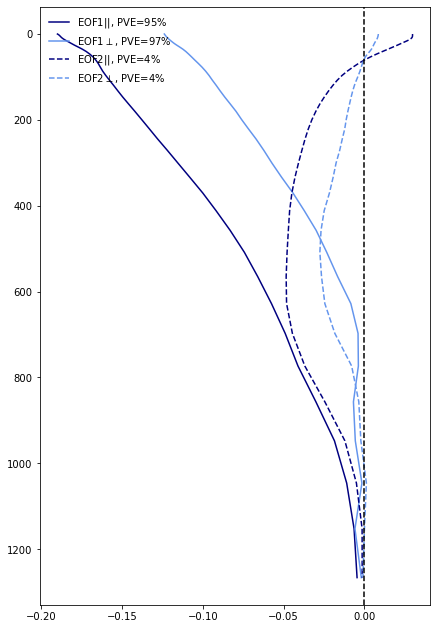

In [124]:
warnings.simplefilter("ignore")
fig, axes = plt.subplots(1,1,figsize = (7,11))

axes.plot(PC1p,up.depth, 'navy', label = f'EOF1$||$, PVE={PVE1p}%')
axes.plot(PC1o,vp.depth, 'cornflowerblue', label = f'EOF1$\perp$, PVE={PVE1o}%')
axes.plot(PC2p,up.depth, 'navy', linestyle = '--', label = f'EOF2$||$, PVE={PVE2p}%')
axes.plot(PC2o,vp.depth, 'cornflowerblue', linestyle = '--', label = f'EOF2$\perp$, PVE={PVE2p}%')
axes.axvline(0, color='k', linestyle = '--')
axes.legend(frameon=False, fontsize=10, loc="upper left") 
axes.invert_yaxis()

In [129]:
up.values

array([[ 0.11614553,  0.11614606,  0.11614661, ..., -0.00392386,
         0.00483982,  0.        ],
       [ 0.20535849,  0.20535307,  0.20534745, ...,  0.00218497,
        -0.00170481,  0.        ],
       [ 0.30260658,  0.30259758,  0.30258846, ...,  0.00289918,
         0.01152539,  0.        ],
       ...,
       [-0.06636851, -0.06637252, -0.06637613, ...,  0.00110156,
        -0.00172582,  0.        ],
       [ 0.17378744,  0.17377399,  0.1737597 , ..., -0.00506271,
        -0.01183887,  0.        ],
       [-0.01698968, -0.01698753, -0.0169857 , ..., -0.01804215,
        -0.00054149,  0.        ]], dtype=float32)

In [127]:
a = vel_par_l**2 + vel_ort_l**2
up.vales
#b = up.values**2 + vp.values**2
print(a)
print(b)

KeyboardInterrupt: 

(774, 344),
            (766, 358),
            (773, 346)

(700.0, 850.0)

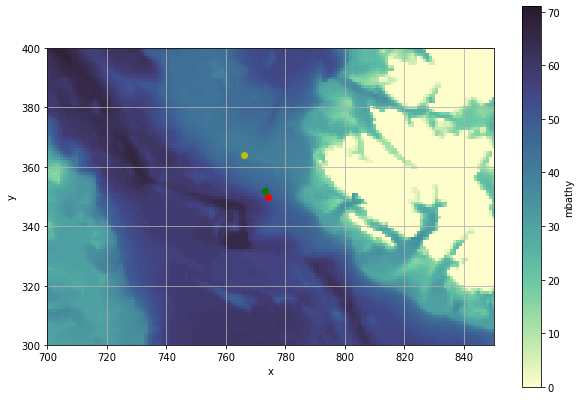

In [118]:
import cmocean
fig, ax = plt.subplots(figsize=(10,7))
bathym.plot(cmap=plt.get_cmap(cmocean.cm.deep))
ax.plot(moor_l[7][0], moor_l[7][1]+6, marker='o', color='r')
ax.plot(moor_l[8][0], moor_l[8][1]+6, marker='o', color='y')
ax.plot(moor_l[9][0], moor_l[9][1]+6, marker='o', color='g')
#ax.plot(moor_l[6][0]-6, moor_l[6][1], marker='o', color='pink')
ax.grid('on')
ax.set_aspect('equal')

ax.set_ylim(300,400)
ax.set_xlim(700,850)

In [147]:
vel_par = np.dot((up,vp),vec)

KeyboardInterrupt: 

In [48]:
#vel_par = (up*b + vp*d)/(np.sqrt(b**2 + d**2))
#vel_ort = (up*d - vp*b)/(np.sqrt(b**2 + d**2))

In [ ]:
d_hbx = bathym.isel(y=slice(0,1149)).diff(dim='x')
d_hby = bathym.isel(x=slice(0,1199)).diff(dim='y')

len_bat = np.sqrt((d_hbx/zonal)**2 + (d_hby/merd)**2)

d_hbxg = d_hbx.rolling(x = 10,).mean()
d_hbyg = d_hby.rolling(y = 10,).mean()

len_batg = np.sqrt((d_hbxg/zonal)**2 + (d_hbyg/merd)**2)
print(zonal.shape)
print(d_hbxg.shape)

/opt/conda/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


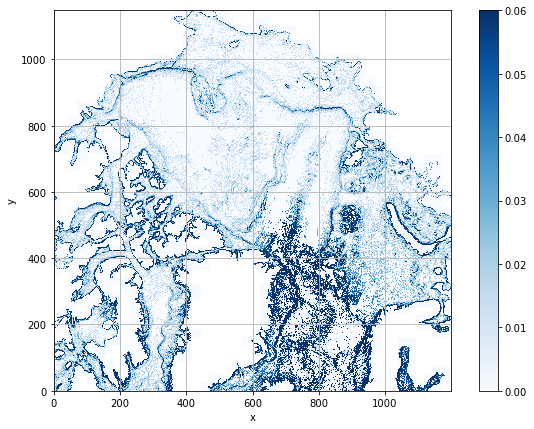

In [8]:
fig, ax = plt.subplots(figsize=(10,7))

cmap = plt.get_cmap('Blues')
c = len_bat.plot(vmin=0, vmax=0.06, cmap=cmap, add_colorbar=False)
#for i,p in enumerate(moor_l):
#    ax.plot(p[0], p[1], marker='o', color=c_list[i])
fig.colorbar(c,
             shrink=1,
             #label=r"Depth [m]"
            )
ax.grid('on')
ax.set_aspect('equal')

In [9]:
def PCz(x,y):
    'Finding the level the given location dosent have values for anymore'

    d = bathym.isel(x=x, y=y).values

    dypu = u.isel(x=x, y=y, depth = slice(0,d-1)) # -1 pga d=0 og vi vil en opp der vi har bunnhastigheter
    dypv = v.isel(x=x, y=y, depth = slice(0,d-1))
    
    covu = np.cov(dypu.T, bias=True) # uten .T ble den en 73x73 matrise 
    values_u, vectors_u = np.linalg.eig(covu)
    order_u = values_u.argsort()[::-1]
    values_u, vectors_u = values_u[order_u], vectors_u[:, order_u]
    
    covv = np.cov(dypv.T, bias=True) # uten .T ble den en 73x73 matrise 
    values_v, vectors_v = np.linalg.eig(covv)
    order_v = values_v.argsort()[::-1]
    values_v, vectors_v = values_v[order_v], vectors_v[:, order_v]
    
    PC1u = (np.sqrt(values_u[0])*vectors_u[:,0])
    PC1v = (np.sqrt(values_v[0])*vectors_v[:,0])
    PC2u = (np.sqrt(values_u[1])*vectors_u[:,1])
    PC2v = (np.sqrt(values_v[1])*vectors_v[:,1])
    
    PVE1u = int(round(values_u[0]/np.sum(values_u)*100,0))
    PVE1v = int(round(values_v[0]/np.sum(values_v)*100,0))
    PVE2u = int(round(values_u[1]/np.sum(values_u)*100,0))
    PVE2v = int(round(values_v[1]/np.sum(values_v)*100,0))
    
    return PC1u, PC1v, PC2u, PC2v, dypu, dypv, PVE1u, PVE1v, PVE2u, PVE2v

In [10]:
'Making a function for the vertical PC'
def PCz_op(x,y):
    up = u.isel(y=y, x=x)
    vp = v.isel(y=y, x=x)
    
    b = d_hbxg.isel(x=x,y=y)/zonal.isel(x=x,y=y)
    d = d_hbyg.isel(x=x,y=y)/merd.isel(x=x,y=y)
    
    vel_par = (up*b + vp*d)/(np.sqrt(b**2 + d**2))
    vel_ort = (up*d - vp*b)/(np.sqrt(b**2 + d**2))
    
    # lag lengde scalar av bathym og dele u_o og u_p på 

    d_p = bathym.isel(y=y, x=x).values
    dyp_o = vel_ort.isel(depth = slice(0,int(d_p)-1)) # -1 pga d=0 og vi vil en opp der vi har bunnhastigheter
    dyp_p = vel_par.isel(depth = slice(0,int(d_p)-1))

    cov_o = np.cov(dyp_o.T, bias=True) # uten .T ble den en 73x73 matrise 
    cov_p = np.cov(dyp_p.T, bias=True)
    
    values_o, vectors_o = np.linalg.eig(cov_o)
    order_o = values_o.argsort()[::-1]
    values_o, vectors_o = values_o[order_o], vectors_o[:, order_o]
    values_p, vectors_p = np.linalg.eig(cov_p)
    order_p = values_p.argsort()[::-1]
    values_p, vectors_p = values_p[order_p], vectors_p[:, order_p]
    
    PC1p = (np.sqrt(values_p[0])*vectors_p[:,0])
    PC1o = (np.sqrt(values_o[0])*vectors_o[:,0])
    PC2p = (np.sqrt(values_p[1])*vectors_p[:,1])
    PC2o = (np.sqrt(values_o[1])*vectors_o[:,1])
    
    PVE1p = int(round(values_p[0]/np.sum(values_p)*100,0))
    PVE1o = int(round(values_o[0]/np.sum(values_o)*100,0))
    PVE2p = int(round(values_p[1]/np.sum(values_p)*100,0))
    PVE2o = int(round(values_o[1]/np.sum(values_o)*100,0))
    
    return PC1p, PC1o, PC2p, PC2o, dyp_p, dyp_o, PVE1p, PVE1o, PVE2p, PVE2o

836 440


KeyboardInterrupt: 

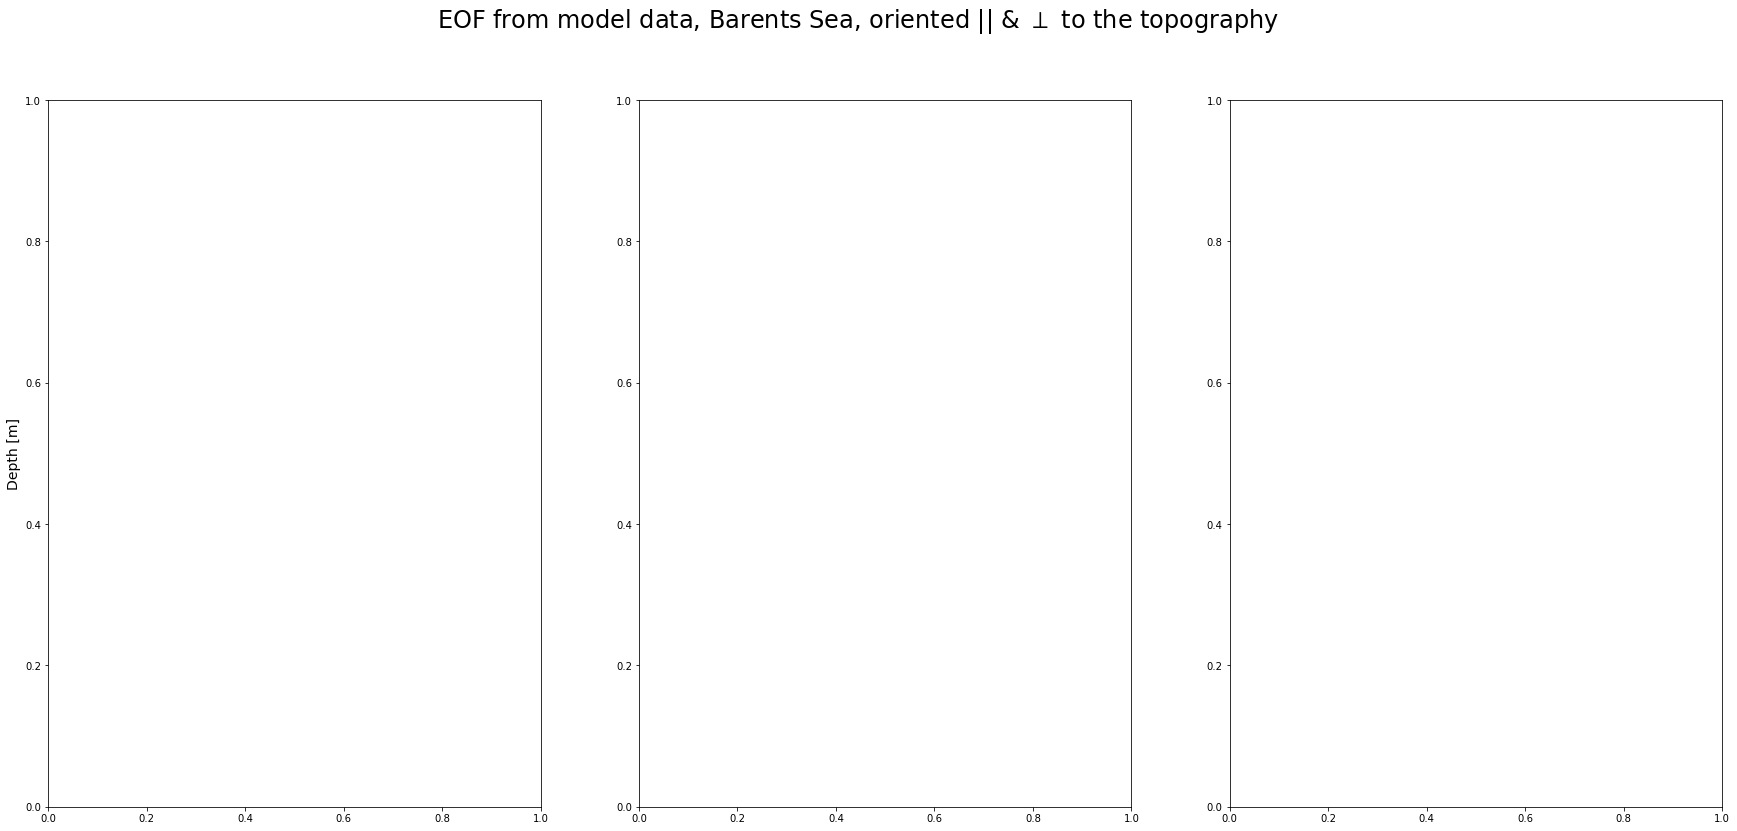

In [12]:
warnings.simplefilter("ignore")
fig, axes = plt.subplots(1,3,figsize = (30,13))
plt.suptitle('EOF from model data, Barents Sea, oriented $||$ & $\perp$ to the topography', 
             horizontalalignment='center',
            fontsize=24)
bar = [(836, 440),(838, 440),(836, 439)]
axes[0].set_ylabel('Depth [m]', fontsize=14)

for axs, p in zip(axes.flat, range(len(bar))):
    pp = moor_l[p]
    print(pp[0], pp[1])    
    PC1p, PC1o, PC2p, PC2o, dypp, dypo, PVE1p, PVE1o, PVE2p, PVE2o = PCz_op(pp[0],pp[1])
        
    axs.plot(PC1p,dypp.depth, 'navy', label = f'EOF1$||$, PVE={PVE1p}%')
    axs.plot(PC1o,dypo.depth, 'cornflowerblue', label = f'EOF1$\perp$, PVE={PVE1o}%')
    axs.plot(PC2p,dypp.depth, 'navy', linestyle = '--', label = f'EOF2$||$, PVE={PVE2p}%')
    axs.plot(PC2o,dypo.depth, 'cornflowerblue', linestyle = '--', label = f'EOF2$\perp$, PVE={PVE2p}%')
    axs.axvline(0, color='k', linestyle = '--')
    axs.legend(frameon=False, fontsize=10, loc="upper left") 
    axs.invert_yaxis()
    axs.set_xlabel('Current speed [cm/s]', fontsize=14)

#fig.tight_layout()   

#plt.savefig('EOF_Barents_mod_topo.pdf', dpi = 300)